In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import svm

In [ ]:
!pip install fbprophet
!pip3 install pydotplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 47.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CMPE_255_DataPrep/Task2/avocado.csv')

In [ ]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
df['Date'] =pd.to_datetime(df.Date)
df.sort_values(by=['Date'], inplace=True)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
11829,51,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
11777,51,2015-01-04,1.70,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
675,51,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
1247,51,2015-01-04,0.92,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,0,2018-03-25,1.21,330371.24,87782.44,137599.47,131.89,104857.44,95210.59,7089.08,2557.77,conventional,2018,HarrisburgScranton
17997,0,2018-03-25,1.52,15372.80,2399.71,3164.80,0.00,9808.29,9789.70,18.59,0.00,organic,2018,PhoenixTucson
17733,0,2018-03-25,1.46,31489.27,5372.35,1047.92,0.00,25069.00,23054.17,2014.83,0.00,organic,2018,DallasFtWorth
8706,0,2018-03-25,1.05,228837.36,53795.52,53103.06,7008.97,114929.81,96343.12,15834.92,2751.77,conventional,2018,Indianapolis


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
11829,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
11777,2015-01-04,1.70,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
675,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
1247,2015-01-04,0.92,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,2018-03-25,1.21,330371.24,87782.44,137599.47,131.89,104857.44,95210.59,7089.08,2557.77,conventional,2018,HarrisburgScranton
17997,2018-03-25,1.52,15372.80,2399.71,3164.80,0.00,9808.29,9789.70,18.59,0.00,organic,2018,PhoenixTucson
17733,2018-03-25,1.46,31489.27,5372.35,1047.92,0.00,25069.00,23054.17,2014.83,0.00,organic,2018,DallasFtWorth
8706,2018-03-25,1.05,228837.36,53795.52,53103.06,7008.97,114929.81,96343.12,15834.92,2751.77,conventional,2018,Indianapolis


In [ ]:
df = df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })

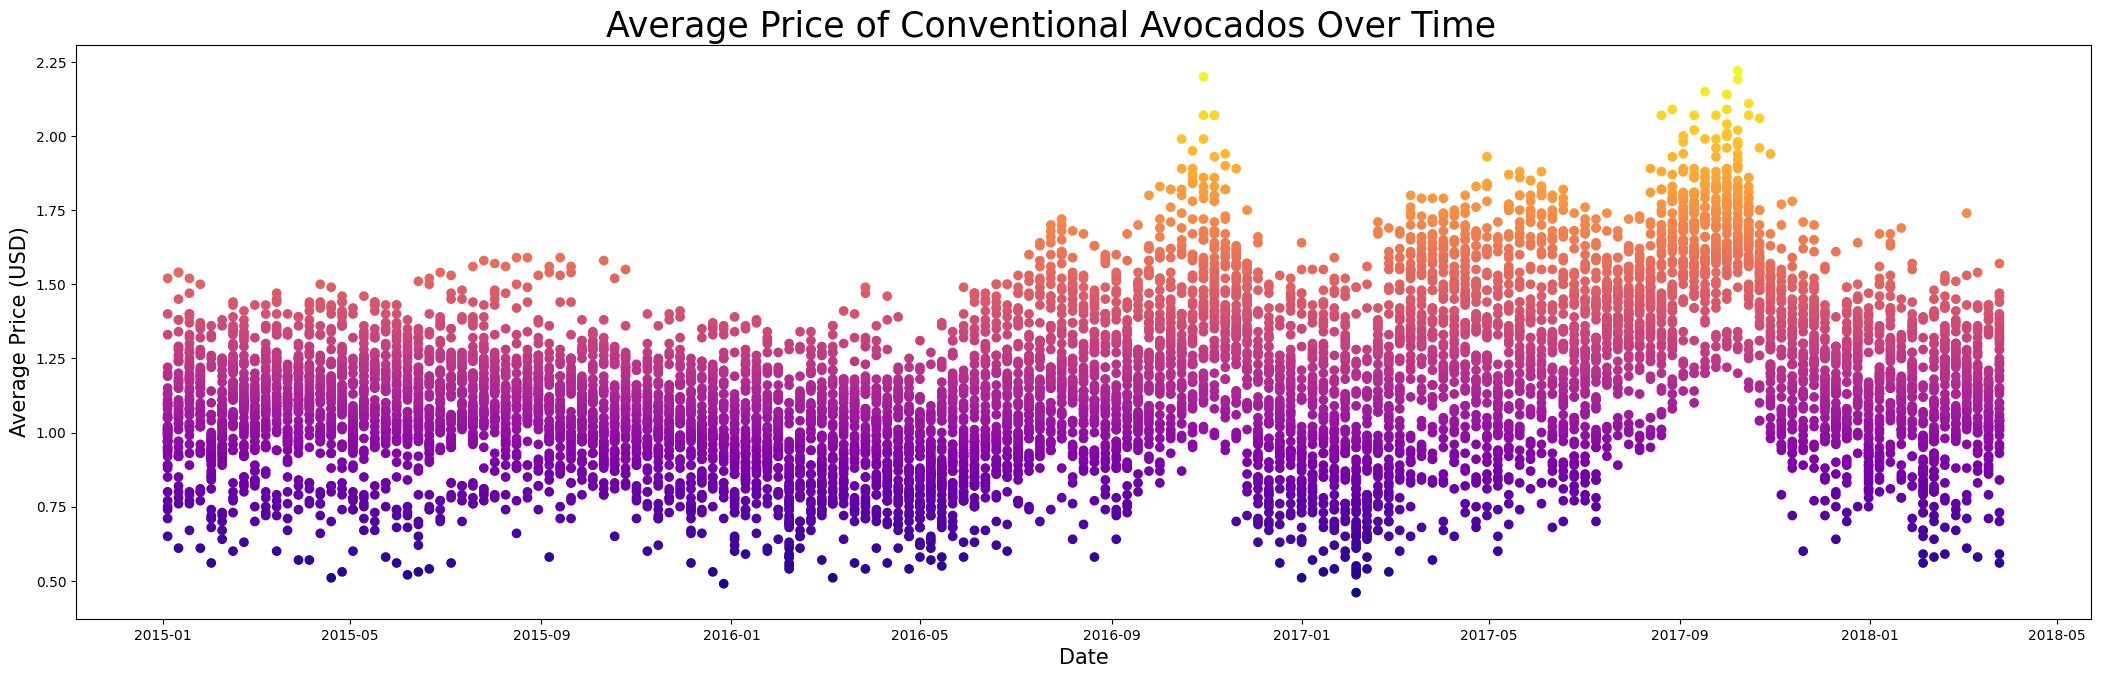

In [ ]:
mask = df['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

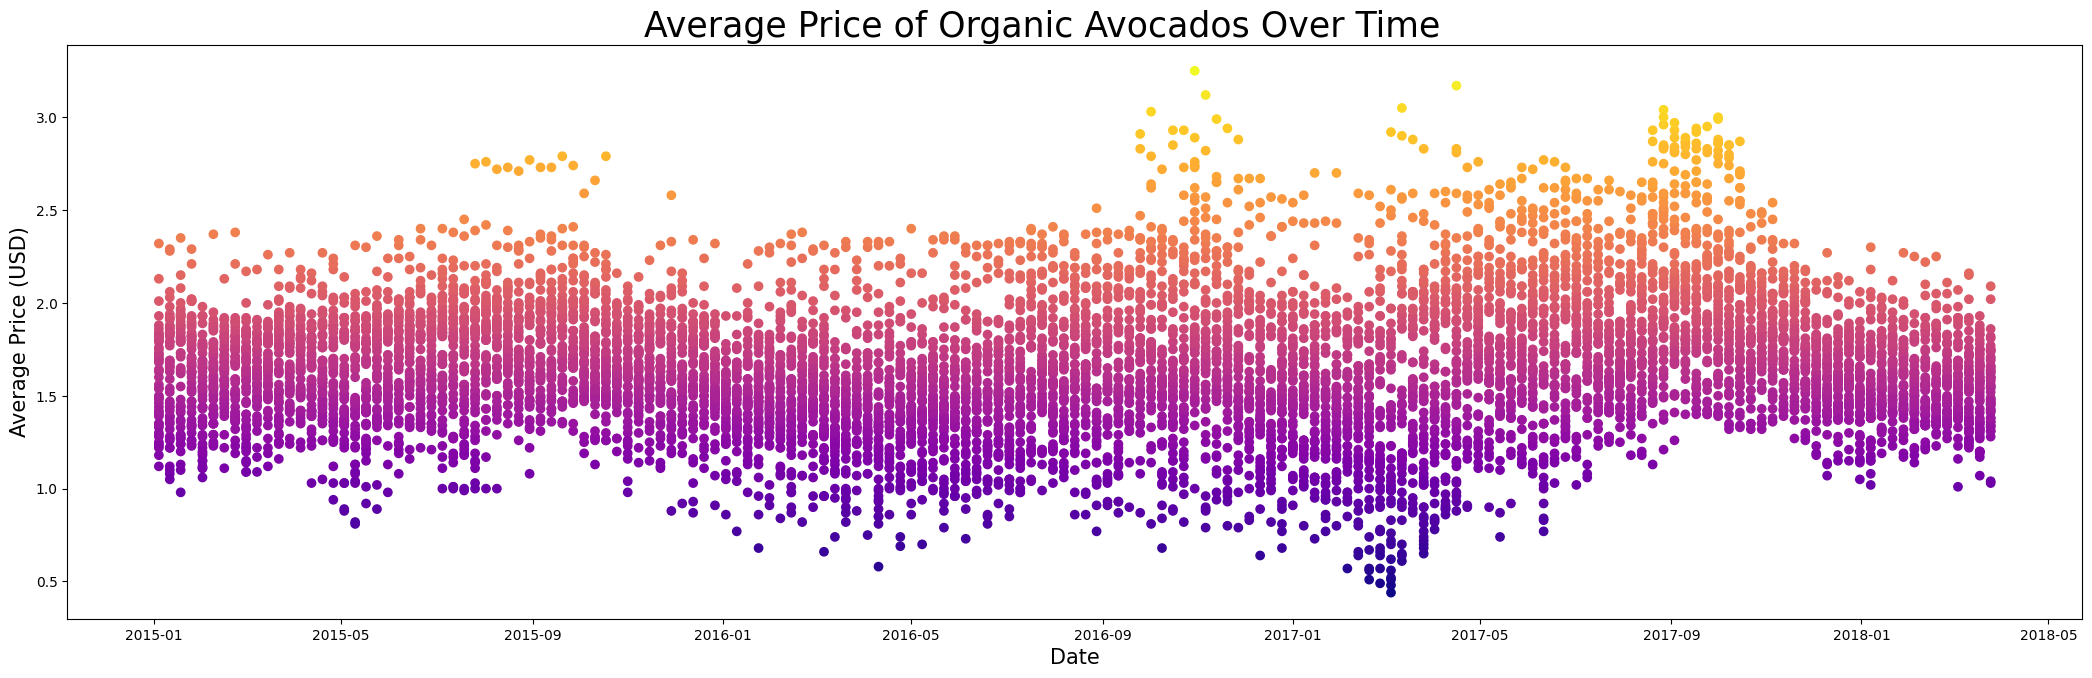

In [ ]:
# Average price of Organic Avocados over time
mask = df['type']== 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = df[mask]['Date'].tolist()
avgPrices = df[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

In [ ]:
df2 = df[['Date', 'AveragePrice']]
df2 = df2.set_index('Date')

weekly_df = df2.resample('W').mean()
w_df = weekly_df.reset_index().dropna()

w_df.sort_values(by=['Date'])
w_df.head()

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


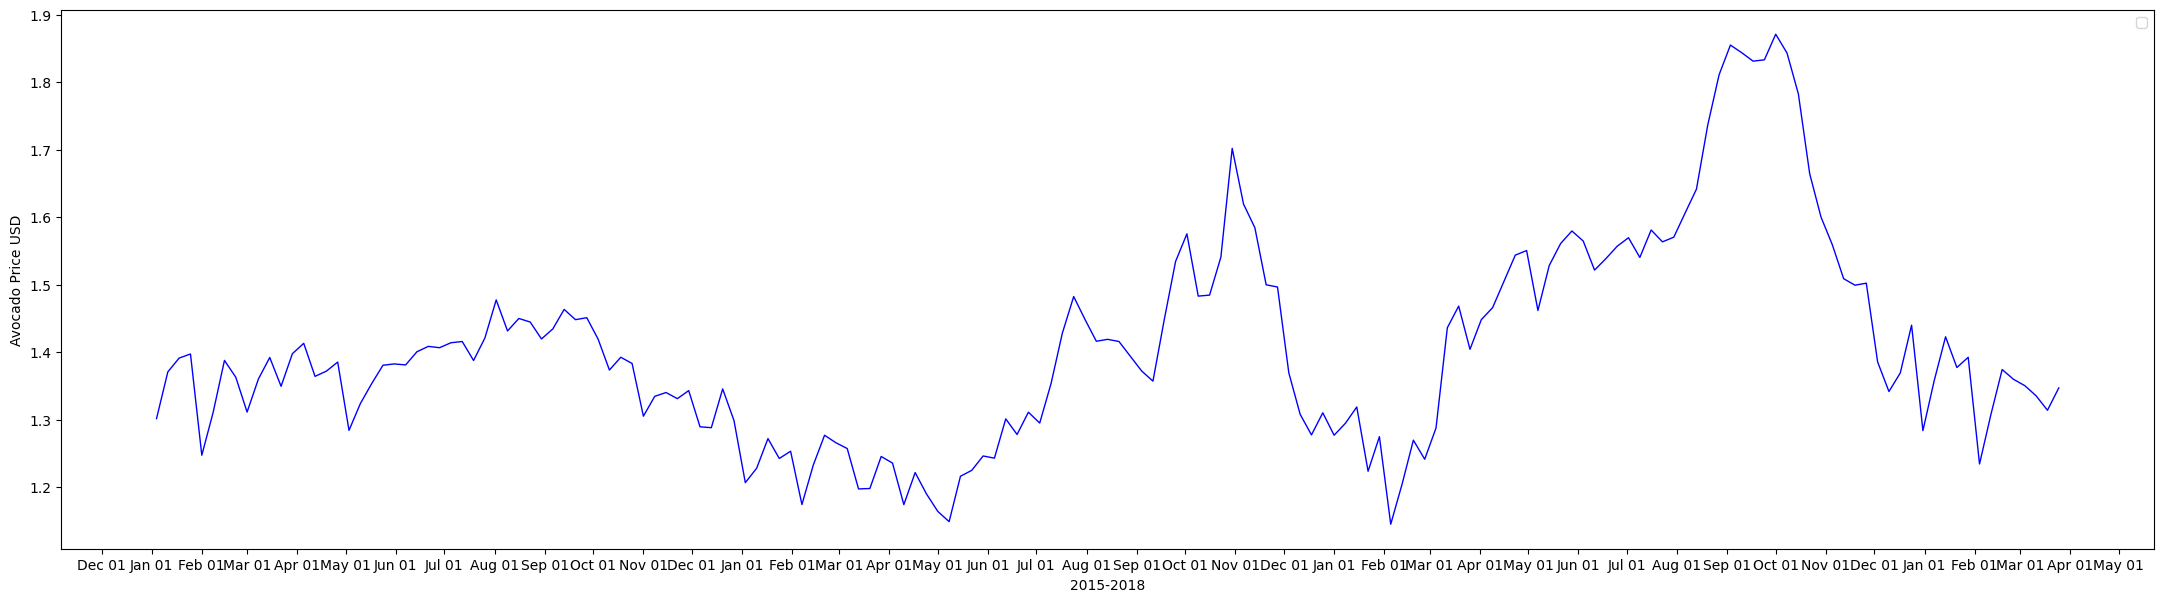

In [ ]:
# Plotting the weekly average prices by month;

import matplotlib.dates as mdates


fig = plt.figure(figsize = (27, 7))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(w_df['Date'],w_df['AveragePrice'],color='b', linewidth=1)
plt.xlabel("2015-2018")
plt.ylabel("Avocado Price USD")
plt.legend()
plt.show()

PROPHET

In [ ]:
!pip3 uninstall --yes fbprophet
!pip3 install fbprophet --no-cache-dir --no-binary :all:
!pip3 install pydotplus --no-cache-dir --no-binary :all:


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
pip install Prophet

In [ ]:
import prophet as p

w_df.columns = ['ds', 'y']

P = p.Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False, changepoint_range=1)

P.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

P.fit(w_df)

future = P.make_future_dataframe(freq='W', periods=4)  # Let's predict the next month's average prices

future.tail()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv81dvqge/tlu16b99.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv81dvqge/70y30nv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2293', 'data', 'file=/tmp/tmpv81dvqge/tlu16b99.json', 'init=/tmp/tmpv81dvqge/70y30nv5.json', 'output', 'file=/tmp/tmpv81dvqge/prophet_model32rpsxhn/prophet_model-20231028213234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:32:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:32:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
168,2018-03-25
169,2018-04-01
170,2018-04-08
171,2018-04-15
172,2018-04-22


[[<matplotlib.lines.Line2D at 0x7991442ae1d0>],

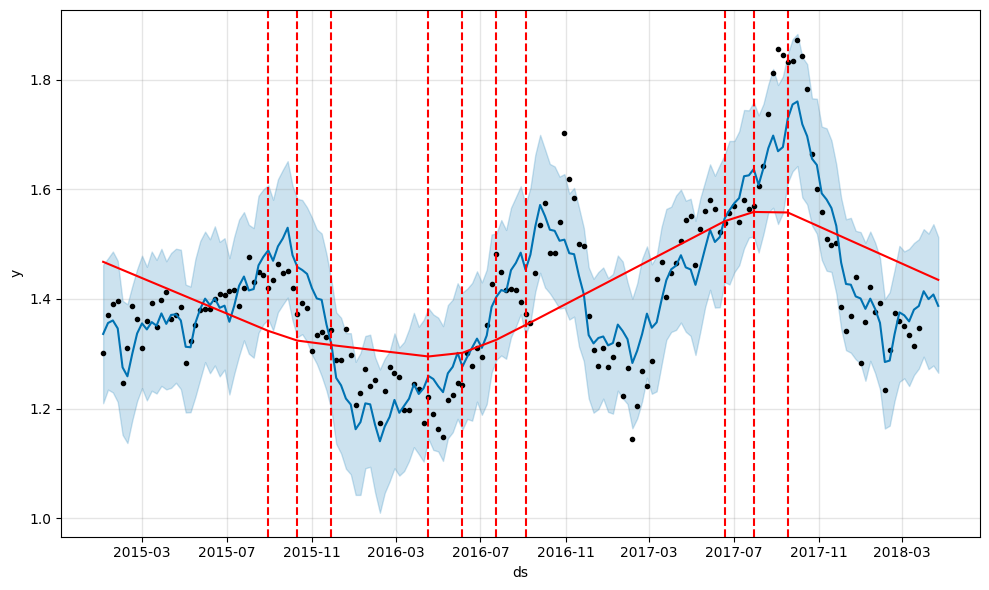

In [ ]:
from prophet.plot import add_changepoints_to_plot

forecast = P.predict(future)
fig = P.plot(forecast)
add_changepoints_to_plot(fig.gca(), P, forecast)



In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
168,2018-03-25,1.387172,1.273072,1.508805
169,2018-04-01,1.414080,1.294737,1.527252
170,2018-04-08,1.399629,1.272126,1.519215
171,2018-04-15,1.408126,1.278619,1.536334
172,2018-04-22,1.387411,1.265387,1.513033


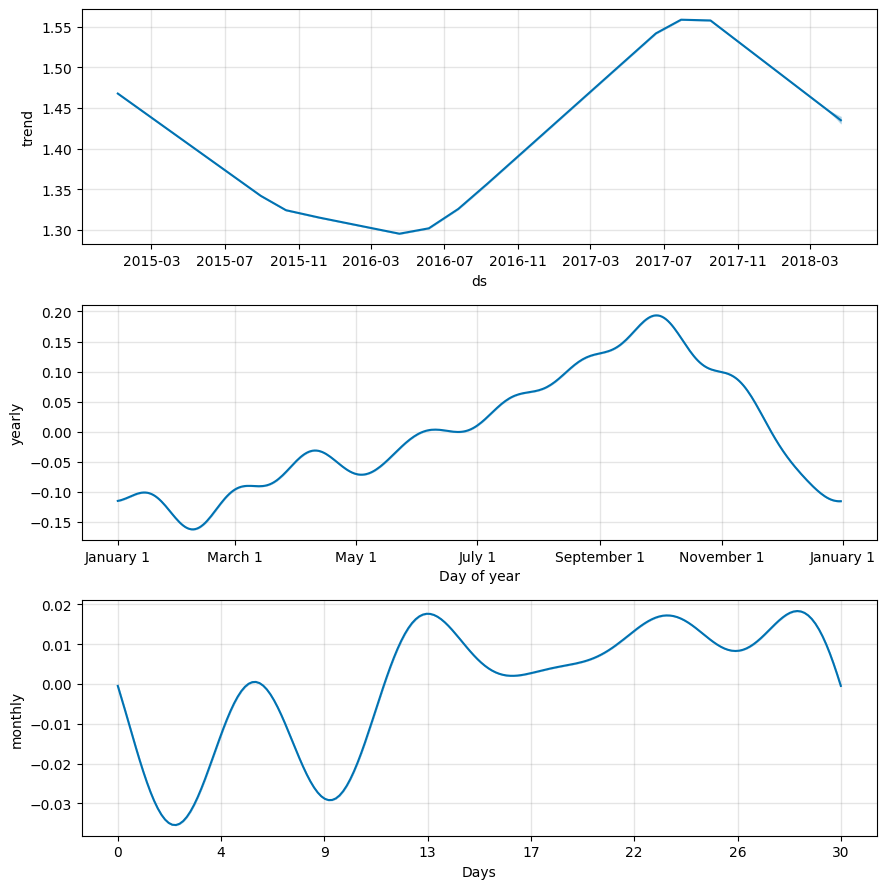

In [ ]:
fig2 = P.plot_components(forecast)

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(P, initial='365 days', period='30 days', horizon='30 days')

df_cv.tail()


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
23,26 days,0.019707,0.140380,0.104004,0.070989,0.044928,0.068492,0.340909
24,27 days,0.010608,0.102995,0.076706,0.053793,0.032991,0.051932,0.500000
25,28 days,0.009572,0.097836,0.083043,0.057744,0.044441,0.057344,0.454545
26,29 days,0.019179,0.138487,0.116857,0.079007,0.099342,0.080015,0.363636
27,30 days,0.027014,0.164359,0.152905,0.103976,0.105834,0.104866,0.181818


In [ ]:
print(np.mean(df_p['mape']))
print(np.mean(df_p['rmse']))

0.07759739835574961
0.13241597404594413


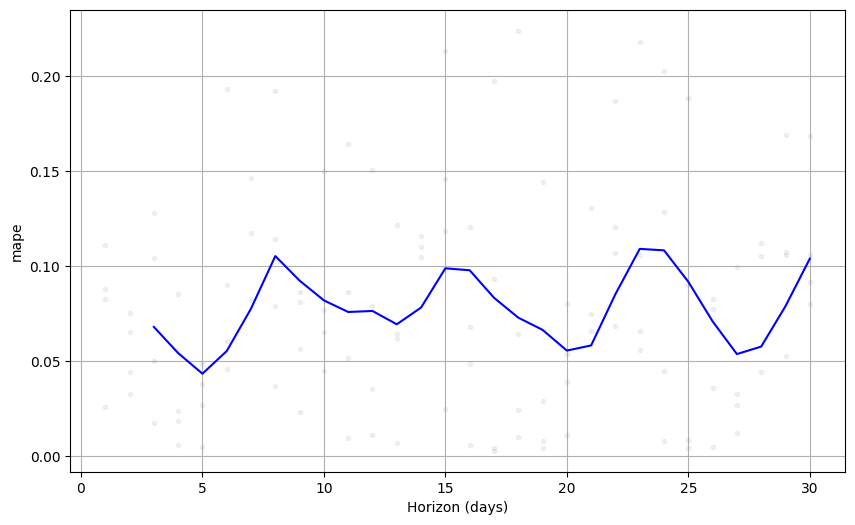

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
df.tail()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8670,2018-03-25,1.21,330371.24,87782.44,137599.47,131.89,104857.44,95210.59,7089.08,2557.77,conventional,2018,HarrisburgScranton
17997,2018-03-25,1.52,15372.80,2399.71,3164.80,0.00,9808.29,9789.70,18.59,0.00,organic,2018,PhoenixTucson
17733,2018-03-25,1.46,31489.27,5372.35,1047.92,0.00,25069.00,23054.17,2014.83,0.00,organic,2018,DallasFtWorth
8706,2018-03-25,1.05,228837.36,53795.52,53103.06,7008.97,114929.81,96343.12,15834.92,2751.77,conventional,2018,Indianapolis
8814,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork


In [ ]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-09-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]

forecastedvalues

,ds,yhat
168,2018-03-25,1.387172
169,2018-04-01,1.414080
170,2018-04-08,1.399629
171,2018-04-15,1.408126
172,2018-04-22,1.387411


In [ ]:
print(forecastedvalues)
print(forecastedvalues.size)
print(forecastedvalues.shape)

            ds      yhat
168 2018-03-25  1.387172
169 2018-04-01  1.414080
170 2018-04-08  1.399629
171 2018-04-15  1.408126
172 2018-04-22  1.387411
10
(5, 2)


Red = Predicted Values, Blue = Base Values


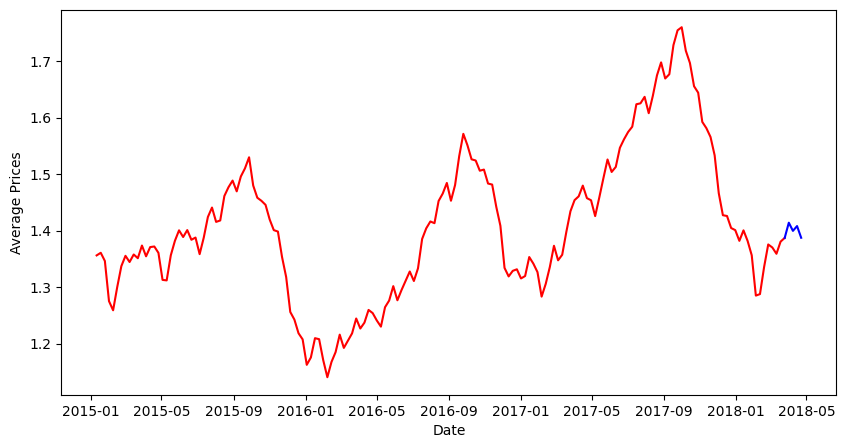

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(forecastnew.set_index('ds'), color='r')
ax1.plot(forecastedvalues.set_index('ds'), color='b')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

ML Algo

In [ ]:
df

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
11829,2015-01-04,1.46,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS
11777,2015-01-04,1.70,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa
675,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver
1247,2015-01-04,0.92,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,2018-03-25,1.21,330371.24,87782.44,137599.47,131.89,104857.44,95210.59,7089.08,2557.77,conventional,2018,HarrisburgScranton
17997,2018-03-25,1.52,15372.80,2399.71,3164.80,0.00,9808.29,9789.70,18.59,0.00,organic,2018,PhoenixTucson
17733,2018-03-25,1.46,31489.27,5372.35,1047.92,0.00,25069.00,23054.17,2014.83,0.00,organic,2018,DallasFtWorth
8706,2018-03-25,1.05,228837.36,53795.52,53103.06,7008.97,114929.81,96343.12,15834.92,2751.77,conventional,2018,Indianapolis


In [ ]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small Hass', 'Large Hass',
       'XLarge Hass', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

In [ ]:
pip install google-cloud-automl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.8/328.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
AveragePrice = df.pop('AveragePrice')
df['AveragePrice'] = AveragePrice

In [ ]:
df

,Date,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,AveragePrice
11569,2015-01-04,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast,1.75
11829,2015-01-04,612910.15,233286.13,216611.20,4370.99,158641.83,115068.71,43573.12,0.00,organic,2015,TotalUS,1.46
11777,2015-01-04,1885.48,748.62,30.19,0.00,1106.67,1106.67,0.00,0.00,organic,2015,Tampa,1.70
675,2015-01-04,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015,Denver,0.99
1247,2015-01-04,101162.98,1991.63,75090.16,283.88,23797.31,7769.36,16027.95,0.00,conventional,2015,Louisville,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,2018-03-25,330371.24,87782.44,137599.47,131.89,104857.44,95210.59,7089.08,2557.77,conventional,2018,HarrisburgScranton,1.21
17997,2018-03-25,15372.80,2399.71,3164.80,0.00,9808.29,9789.70,18.59,0.00,organic,2018,PhoenixTucson,1.52
17733,2018-03-25,31489.27,5372.35,1047.92,0.00,25069.00,23054.17,2014.83,0.00,organic,2018,DallasFtWorth,1.46
8706,2018-03-25,228837.36,53795.52,53103.06,7008.97,114929.81,96343.12,15834.92,2751.77,conventional,2018,Indianapolis,1.05


In [ ]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=6f23b230e7740fd0bc38e6f298a5ad570b5ac801932b2a1dfcbffe921f1c2550
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [ ]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_3mj9_ff
  JVM stdout: /tmp/tmp_3mj9_ff/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_3mj9_ff/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_soambd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
h2o_data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
y = "AveragePrice"
x = h2o_data.columns
x.remove(y)


In [ ]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(max_models=5, seed=1, max_runtime_secs=500)
automl.train(x=x, y=y, training_frame=h2o_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
lb = automl.leaderboard
print(lb.head())

# Best model
ensemble_model = automl.leader


model_id                                                      rmse         mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_4_20231028_234142     0.0886515  0.00785909  0.0619321  0.0349517                0.00785909
StackedEnsemble_BestOfFamily_1_AutoML_4_20231028_234142  0.088842   0.00789291  0.0619794  0.0350134                0.00789291
GBM_1_AutoML_4_20231028_234142                           0.089598   0.00802779  0.0625378  0.0352927                0.00802779
XGBoost_2_AutoML_4_20231028_234142                       0.115226   0.013277    0.0824876  0.046121                 0.013277
XGBoost_1_AutoML_4_20231028_234142                       0.116696   0.013618    0.0838535  0.0466573                0.013618
DRF_1_AutoML_4_20231028_234142                           0.127672   0.0163001   0.0897847  0.0504779                0.0163001
GLM_1_AutoML_4_20231028_234142                           0.258392   0.0667664   0.195253   0.104177                 

In [ ]:
predictions = ensemble_model.predict(h2o_data)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
predictions

predict
1.71748
1.45633
1.66855
0.97782
0.903432
2.18857
2.06362
0.934748
0.988168
1.54633


In [ ]:
h2o.cluster().shutdown()


H2O session _sid_8d72 closed.
